
1. 문제 제기
이탈률 = 이탈 자수 / 총 고객수(연도별 누적 가입자수 or 특성 그룹의 사람 수)
연도별로 이탈 여부 (한번이라도)

특성 그룹 (이탈 횟수)

click_stream 거래를 안한 개인의 행동분석 (customer_id)

세션 분할
click_stream 세션 엄청 길었던게(70일) 69

click_stream - customer_id 있는데 거래를 안한정보

click_stream - customer_id : transaction > 거래


2. 이탈 모델 (이탈 확률)
homepage -> booking 비율 높을때 (homepage)
homepage -> booking 비율 낮을때 (booking)
기준?

1]10일동안 hmpage 방문 안한고객 이탈
2]30일동안 booking 방문 안한고객 이탈


코로나 이후로 소비 패턴이 변화되어 회사의 행동을 결정하기 위한 분석 
이탈 모델의 경우는 20~21 년도 행동 분석으로
이탈 특성 생성 (0/1)

전체 고객에 대한 이탈 비율
한 고객의 이탈 횟수

이커머스 평균 구매 전환률 2%

In [2]:
import pandas as pd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt


In [3]:
click_stream = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/data_refine/click_stream_final.csv')

In [4]:
transaction = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/data_refine/transaction_final.csv')
product = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/data_refine/product_final.csv')
customer = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/data_refine/customer_final.csv')

In [5]:
#session_id 와 customer_id 가 1대1 인지 확인하는 코드
customer_cnt = transaction.groupby('session_id')['customer_id'].nunique()
customer_cnt.value_counts()

customer_id
1    852584
Name: count, dtype: int64

In [6]:

#중복제거
trans = transaction[['session_id', 'customer_id']].drop_duplicates()
merged_data = pd.merge(click_stream, trans, on = 'session_id' , how = 'left')

#구매내역이 있는 고객의 click stream 데이터
notnull_merge = merged_data[merged_data['customer_id'].notnull()].sort_values(['customer_id', 'event_time']).reset_index(drop = True)

#구매내역이 없는 고객의 click stream 데이터
isnull_merge = merged_data[merged_data['customer_id'].isnull()].sort_values(['customer_id', 'event_time']).reset_index(drop = True)

## 데이터 분포

In [7]:
#event_time 기준으로 연도별 데이터 분할
notnull_merge['event_time'] = pd.to_datetime(notnull_merge['event_time'])

df_2016 = notnull_merge[notnull_merge['event_time'].dt.year == 2016]
df_2017 = notnull_merge[notnull_merge['event_time'].dt.year == 2017]
df_2018 = notnull_merge[notnull_merge['event_time'].dt.year == 2018]
df_2019 = notnull_merge[notnull_merge['event_time'].dt.year == 2019]
df_2020 = notnull_merge[notnull_merge['event_time'].dt.year == 2020]
df_2021 = notnull_merge[notnull_merge['event_time'].dt.year == 2021]
df_2022 = notnull_merge[notnull_merge['event_time'].dt.year == 2022]


In [8]:
data_count = pd.DataFrame([len(df_2016), len(df_2017), len(df_2018), len(df_2019), len(df_2020), len(df_2021), len(df_2022)])

<function matplotlib.pyplot.show(close=None, block=None)>

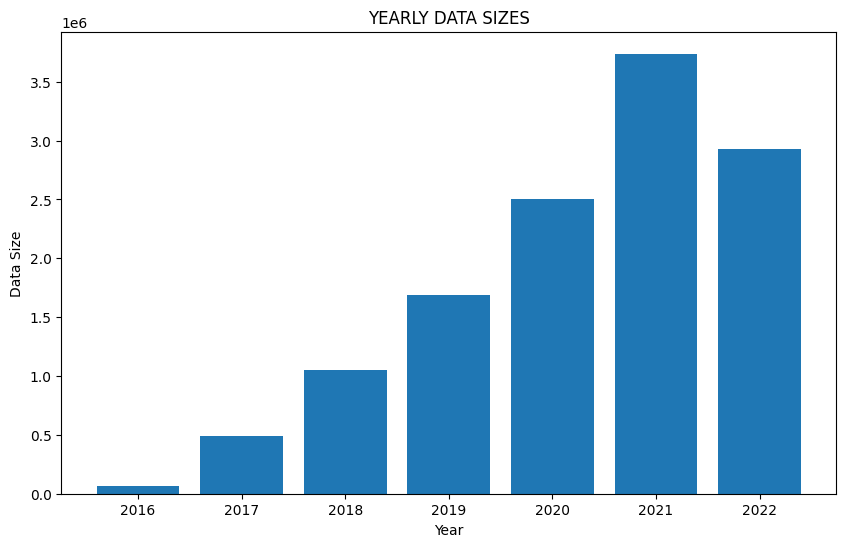

In [9]:
#연도별 click_stream 데이터 분포

plt.figure(figsize=(10, 6))
plt.bar([2016, 2017, 2018, 2019, 2020, 2021, 2022], data_count[0])
plt.xlabel('Year')
plt.ylabel('Data Size')
plt.title(f'YEARLY DATA SIZES')
plt.show

## 신규 가입 분석

### 연도별 신규가입

In [10]:
#연도별 신규 가입 고객 수 계산

customer.first_join_date = pd.to_datetime(customer.first_join_date)

join_2016 = customer[customer.first_join_date.dt.year == 2016]
join_2017 = customer[customer.first_join_date.dt.year == 2017]
join_2018 = customer[customer.first_join_date.dt.year == 2018]
join_2019 = customer[customer.first_join_date.dt.year == 2019]
join_2020 = customer[customer.first_join_date.dt.year == 2020]
join_2021 = customer[customer.first_join_date.dt.year == 2021]
join_2022 = customer[customer.first_join_date.dt.year == 2022]

join_count = pd.DataFrame([len(join_2016), len(join_2017), len(join_2018), len(join_2019), len(join_2020), len(join_2021), len(join_2022)])

<function matplotlib.pyplot.show(close=None, block=None)>

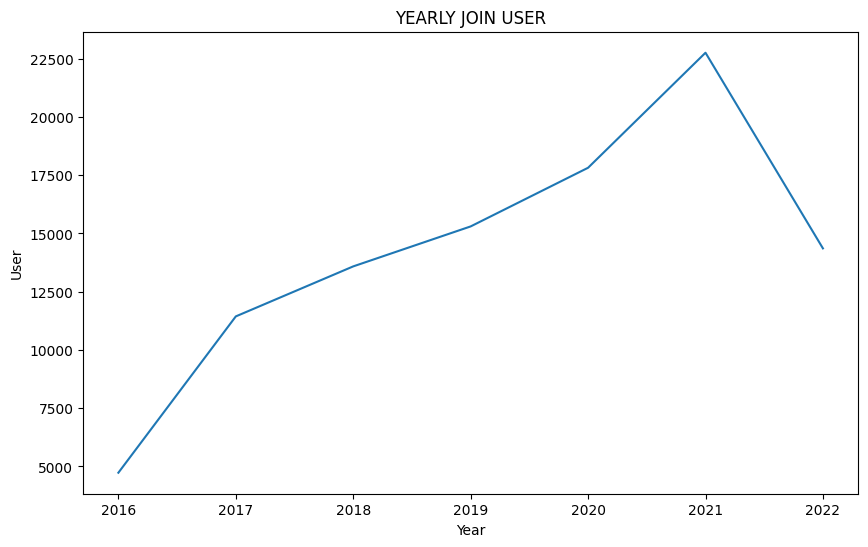

In [11]:
#연도별 신규 가입 고객 수 그래프 

plt.figure(figsize=(10, 6))
plt.plot([2016, 2017, 2018, 2019, 2020, 2021, 2022], join_count)
plt.xlabel('Year')
plt.ylabel('User')
plt.title(f'YEARLY JOIN USER')
plt.show

### 월간 신규가입

In [55]:
#월간 신규 가입 고객 수 계산
def monthly_join_user(df):
    list = []
    for i in range(1,13):
        list.append(len(df[df.first_join_date.dt.month == i]))
        year = df.first_join_date.dt.year.unique()[0]
    return [list, year]

#월간 신규 가입 고객 수 그래프 
def plot_monthly_graph(df):
    plt.figure(figsize=(10, 6))
    plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], df[0])
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.xlabel('Month')
    plt.ylabel('User')
    plt.title(f'{df[1]} MONTHLY JOIN USER')
    return plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

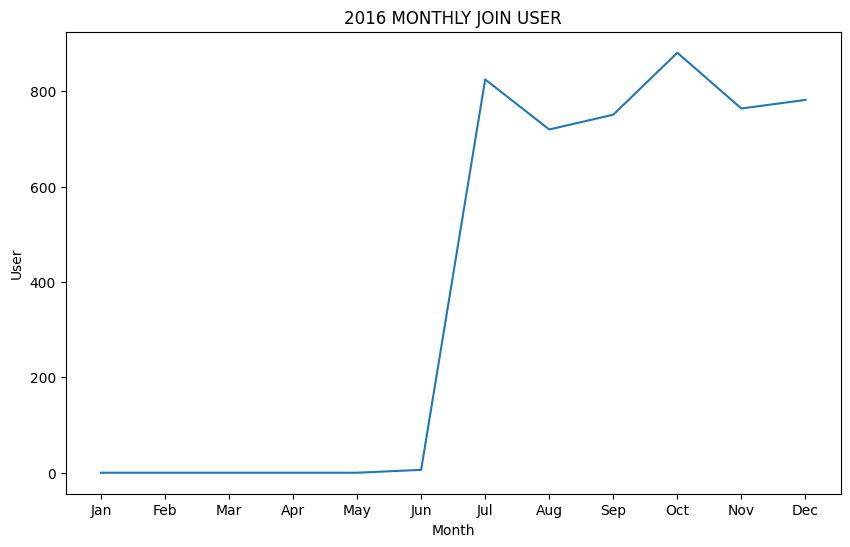

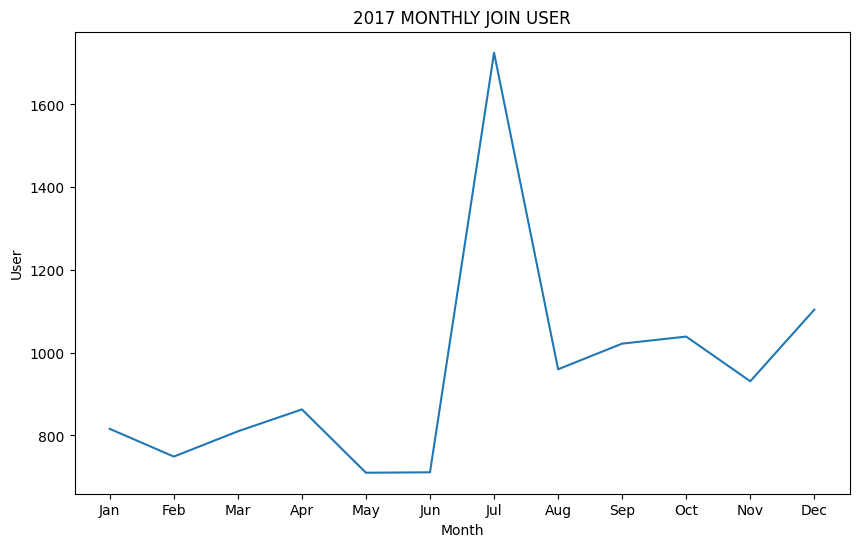

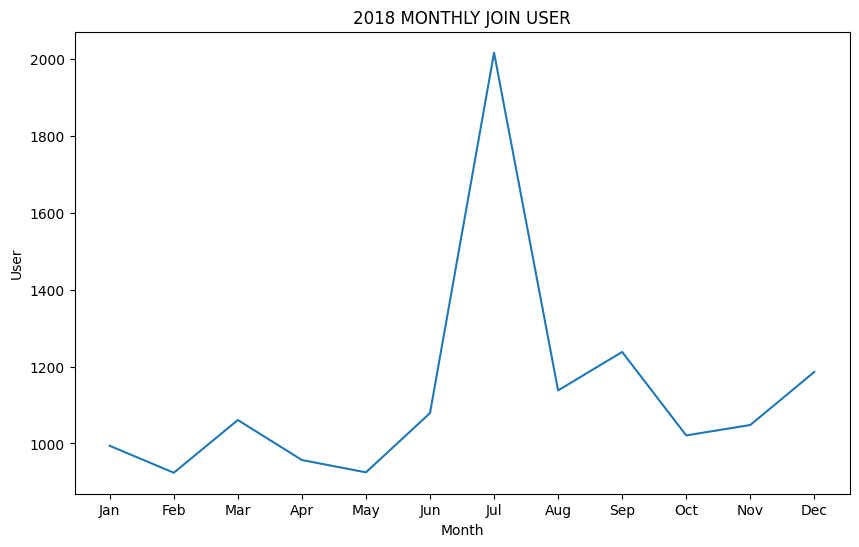

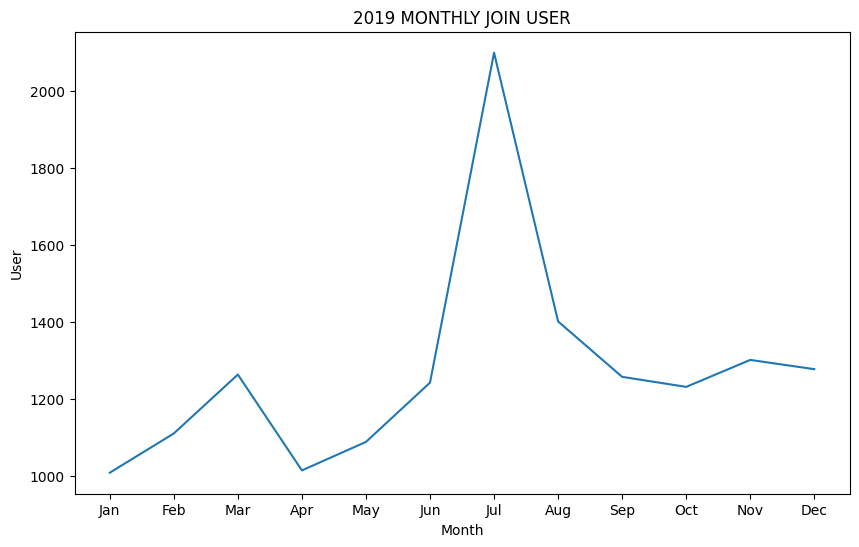

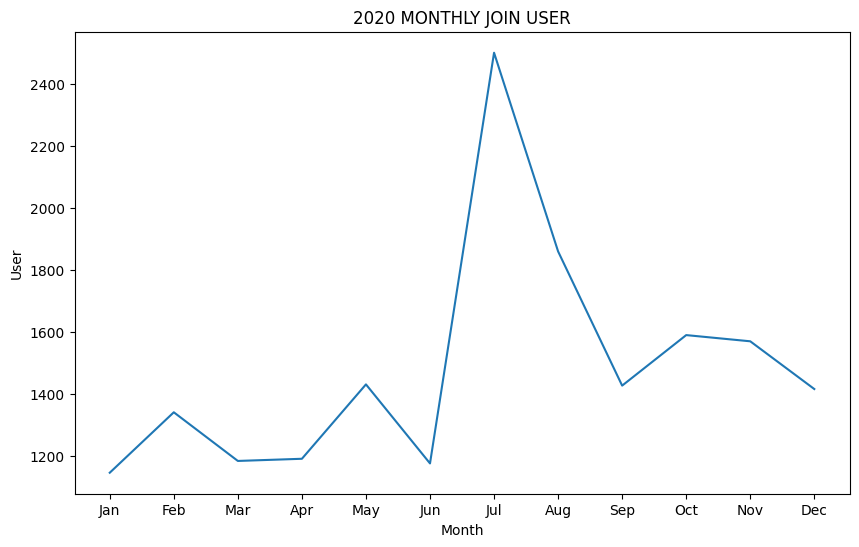

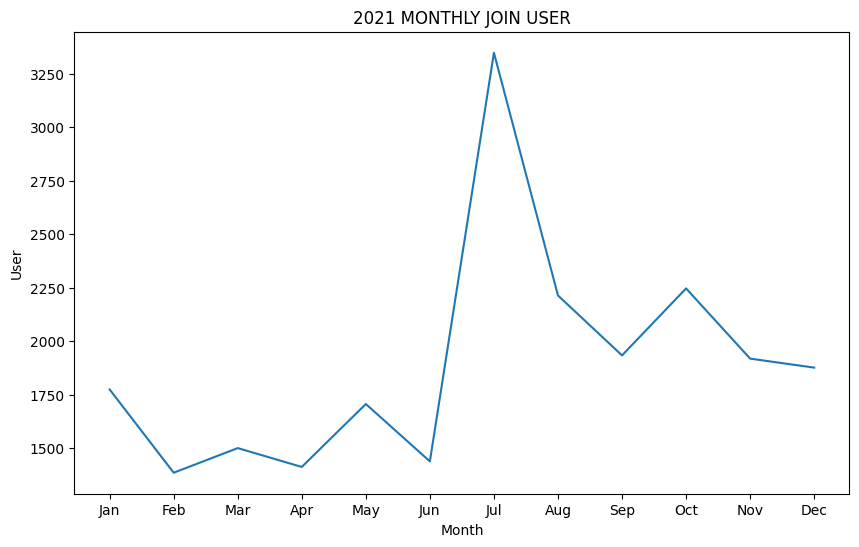

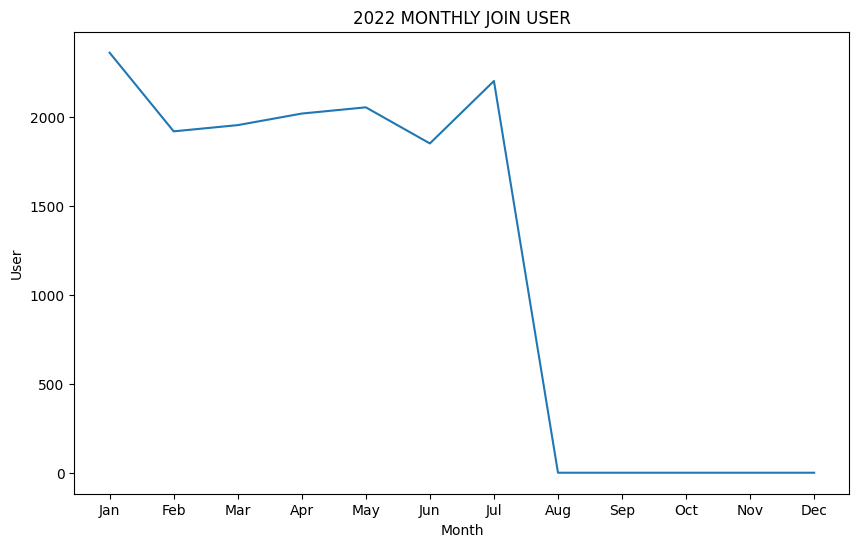

In [56]:
#월간 신규 가입

plot_monthly_graph(monthly_join_user(join_2016))
plot_monthly_graph(monthly_join_user(join_2017))
plot_monthly_graph(monthly_join_user(join_2018))
plot_monthly_graph(monthly_join_user(join_2019))
plot_monthly_graph(monthly_join_user(join_2020))
plot_monthly_graph(monthly_join_user(join_2021))
plot_monthly_graph(monthly_join_user(join_2022))

### 누적 고객수

In [79]:
# 전체 기간 누적 고객 수 구하기
#concat 하기 위해 데이터 프레임으로 변경
monthly_2016 = pd.DataFrame(monthly_join_user(join_2016)[0])
monthly_2017 = pd.DataFrame(monthly_join_user(join_2017)[0])
monthly_2018 = pd.DataFrame(monthly_join_user(join_2018)[0])
monthly_2019 = pd.DataFrame(monthly_join_user(join_2019)[0])
monthly_2020 = pd.DataFrame(monthly_join_user(join_2020)[0])
monthly_2021 = pd.DataFrame(monthly_join_user(join_2021)[0])
monthly_2022 = pd.DataFrame(monthly_join_user(join_2022)[0])

#전체 기간 concat
monthly_total = pd.concat([monthly_2016, monthly_2017, monthly_2018, monthly_2019, monthly_2020, monthly_2021, monthly_2022]).reset_index(drop = True)

#전체 기간 누적 데이터 생성
monthly_total['Cumulative People'] = monthly_total[0].cumsum()


<function matplotlib.pyplot.show(close=None, block=None)>

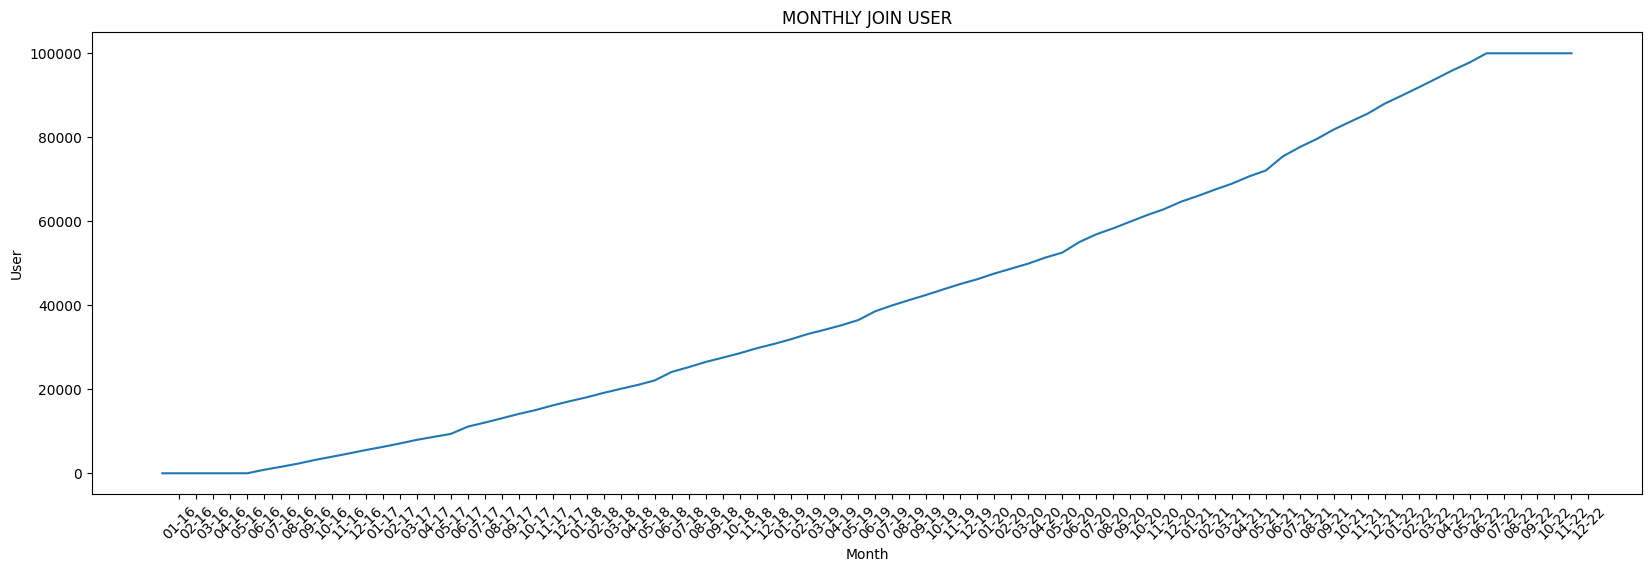

In [80]:
#누적 고객 그래프 

plt.figure(figsize=(20, 6))
plt.plot(monthly_total['Cumulative People'])
plt.xticks(range(1, 85), ['01-16', '02-16', '03-16', '04-16', '05-16', '06-16', '07-16', '08-16', '09-16', '10-16', '11-16', '12-16',
'01-17', '02-17', '03-17', '04-17', '05-17', '06-17', '07-17', '08-17', '09-17', '10-17', '11-17', '12-17',
 '01-18', '02-18', '03-18', '04-18', '05-18', '06-18', '07-18', '08-18', '09-18', '10-18', '11-18', '12-18',
 '01-19', '02-19', '03-19', '04-19', '05-19', '06-19', '07-19', '08-19', '09-19', '10-19', '11-19', '12-19',
 '01-20', '02-20', '03-20', '04-20', '05-20', '06-20', '07-20', '08-20', '09-20', '10-20', '11-20', '12-20',
'01-21', '02-21', '03-21', '04-21', '05-21', '06-21', '07-21', '08-21', '09-21', '10-21', '11-21', '12-21',
'01-22', '02-22', '03-22', '04-22', '05-22', '06-22', '07-22', '08-22', '09-22', '10-22', '11-22', '12-22' ], rotation= 45)
plt.xlabel('Month')
plt.ylabel('User')
plt.title(f'MONTHLY JOIN USER')
plt.show

### 전월대비 증감률

In [81]:
# 전월 대비 신규 고객의 증감율 계산해보기
rate = []
for i in range(len(monthly_total)-1):
    m1 = monthly_total[0][i]
    m2 = monthly_total[0][i+1]
    if m1 != 0:
        res = (m2 - m1) / m1 * 100
    if m1 == 0:
        res = 0
    rate.append(res)


<function matplotlib.pyplot.show(close=None, block=None)>

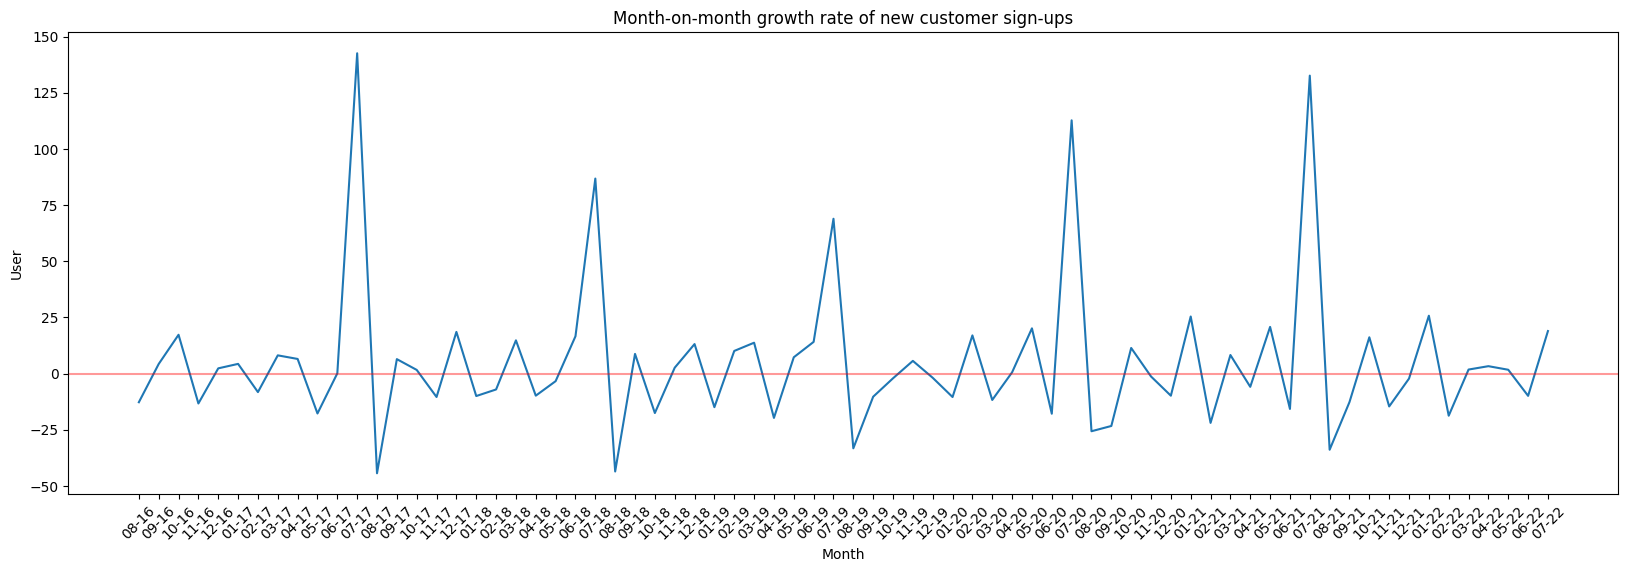

In [73]:
# 전월 대비 신귝 고객의 증감율 그래프
plt.figure(figsize=(20, 6))
plt.plot(rate[6:-5])
plt.xticks(range(0, 72), ['08-16', '09-16', '10-16', '11-16', '12-16',
'01-17', '02-17', '03-17', '04-17', '05-17', '06-17', '07-17', '08-17', '09-17', '10-17', '11-17', '12-17',
 '01-18', '02-18', '03-18', '04-18', '05-18', '06-18', '07-18', '08-18', '09-18', '10-18', '11-18', '12-18',
 '01-19', '02-19', '03-19', '04-19', '05-19', '06-19', '07-19', '08-19', '09-19', '10-19', '11-19', '12-19',
 '01-20', '02-20', '03-20', '04-20', '05-20', '06-20', '07-20', '08-20', '09-20', '10-20', '11-20', '12-20',
'01-21', '02-21', '03-21', '04-21', '05-21', '06-21', '07-21', '08-21', '09-21', '10-21', '11-21', '12-21',
'01-22', '02-22', '03-22', '04-22', '05-22', '06-22', '07-22' ], rotation= 45)
plt.axhline(y=0, color = 'red', alpha = 0.4)
plt.xlabel('Month')
plt.ylabel('User')
plt.title('Month-on-month growth rate of new customer sign-ups')
plt.show

## 이탈 분석

### 연도별 구매 이용 고객의 비율

In [97]:
#연도별 구매한 고객의 수 리스트
buy_customer = [len(df_2016.customer_id.unique()), len(df_2017.customer_id.unique()), len(df_2018.customer_id.unique()), len(df_2019.customer_id.unique()), len(df_2020.customer_id.unique()), len(df_2021.customer_id.unique()), len(df_2022.customer_id.unique())]

In [111]:

buy_year = pd.DataFrame(columns=['user', 'buy_user'])

#누적 회원수
buy_year['user'] = join_count.cumsum()[0]

#연도별 구매 고객 리스트
buy_year['buy_user'] = buy_customer

buy_year.index = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

#연도별 전체 회원 중 구매 이용 고객 비율
buy_year['buy_ratio'] = buy_year['buy_user']/buy_year['user']
buy_year

,user,buy_user,buy_ratio
2016,4729,2490,0.526538
2017,16169,8326,0.514936
2018,29756,14403,0.484037
2019,45059,21305,0.472825
2020,62880,28978,0.460846
2021,85640,36516,0.426390
2022,100000,32828,0.328280


<function matplotlib.pyplot.show(close=None, block=None)>

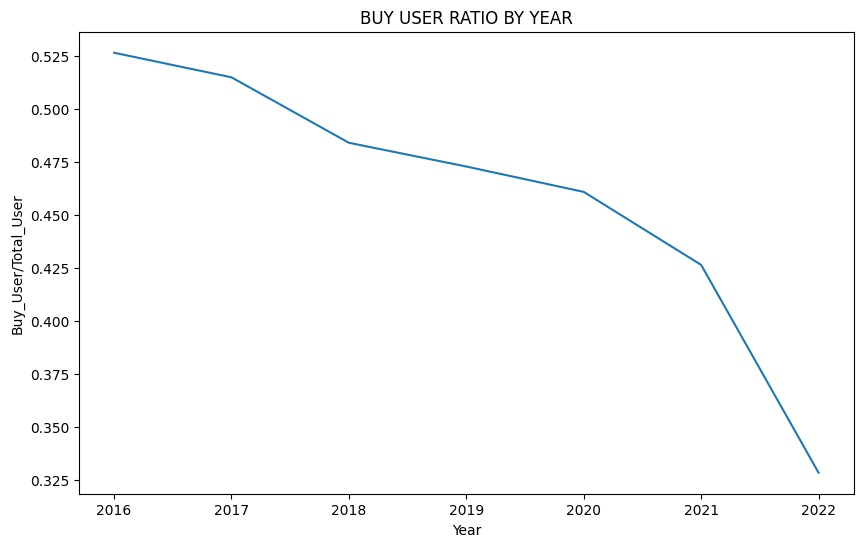

In [115]:
#연도별 전체 회원 중 구매 이용 고객 비율 그래프
plt.figure(figsize=(10, 6))
plt.plot(buy_year['buy_ratio'])
plt.xlabel('Year')
plt.ylabel('Buy_User/Total_User')
plt.title('BUY USER RATIO BY YEAR')
plt.show

문제제기 : 회원수는 늘어나는 것 같아 보이지만 실제적으로 구매로 이어지는 회원비율는 감소하고 있다.

### 이탈 함수

In [138]:
# 구매내역 있는 고객 데이터 (stream / customer / transaction)
buy_customer = pd.merge(notnull_merge, customer, on = 'customer_id', how = 'left')
buy_customer.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now
0,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,HOMEPAGE,2018-08-25 18:53:48.906490+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,3.0,M,1986-07-12,Jakarta Raya,2018-08-25,32,36
1,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25 18:53:51.906490+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,3.0,M,1986-07-12,Jakarta Raya,2018-08-25,32,36
2,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25 18:53:53.906490+00:00,MOBILE,33350.0,1,318832,NaN,NaN,0.0,0,3.0,M,1986-07-12,Jakarta Raya,2018-08-25,32,36
3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25 18:53:54.906490+00:00,MOBILE,56019.0,5,166934,NaN,NaN,0.0,0,3.0,M,1986-07-12,Jakarta Raya,2018-08-25,32,36
4,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25 18:53:55.906490+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,3.0,M,1986-07-12,Jakarta Raya,2018-08-25,32,36


In [139]:
#연도별로 나누기
buy_2016 = buy_customer[buy_customer['event_time'].dt.year == 2016]
buy_2017 = buy_customer[buy_customer['event_time'].dt.year == 2017]
buy_2018 = buy_customer[buy_customer['event_time'].dt.year == 2018]
buy_2019 = buy_customer[buy_customer['event_time'].dt.year == 2019]
buy_2020 = buy_customer[buy_customer['event_time'].dt.year == 2020]
buy_2021 = buy_customer[buy_customer['event_time'].dt.year == 2021]
buy_2022 = buy_customer[buy_customer['event_time'].dt.year == 2022]


In [142]:
buy_2016[buy_2016.customer_id == buy_2016.customer_id.unique()[0]]

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now
3727,44122af0-0bf5-407b-b3ff-22c082c61426,HOMEPAGE,2016-10-09 21:17:34.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,50.0,F,2000-07-12,Jawa Barat,2016-10-09,16,22
3728,44122af0-0bf5-407b-b3ff-22c082c61426,ADD_TO_CART,2016-10-09 21:28:40.380487+00:00,MOBILE,24639.0,1,255356,NaN,NaN,0.0,0,50.0,F,2000-07-12,Jawa Barat,2016-10-09,16,22
3729,44122af0-0bf5-407b-b3ff-22c082c61426,HOMEPAGE,2016-10-09 21:30:22.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,50.0,F,2000-07-12,Jawa Barat,2016-10-09,16,22
3730,44122af0-0bf5-407b-b3ff-22c082c61426,HOMEPAGE,2016-10-09 21:42:14.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,50.0,F,2000-07-12,Jawa Barat,2016-10-09,16,22
3731,44122af0-0bf5-407b-b3ff-22c082c61426,ITEM_DETAIL,2016-10-09 21:54:20.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,50.0,F,2000-07-12,Jawa Barat,2016-10-09,16,22
3732,44122af0-0bf5-407b-b3ff-22c082c61426,BOOKING,2016-10-09 22:16:09.673705+00:00,MOBILE,NaN,0,0,1.0,NaN,0.0,0,50.0,F,2000-07-12,Jawa Barat,2016-10-09,16,22


In [145]:
transaction[transaction.session_id == '44122af0-0bf5-407b-b3ff-22c082c61426']

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,with_promo
441518,2016-10-09 22:16:09.673705+00:00,50,097c5406-68c5-4ecc-8399-8745cb3ff0ca,44122af0-0bf5-407b-b3ff-22c082c61426,Credit Card,1,0,0.0,10000,265356,24639,1,255356,0


In [143]:
base_period = 10

In [ ]:
for id in customer.customer_id.unique():